In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.035
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[216.5304619  222.46617009  92.64281122 ... 138.0787941  136.65933225
 179.24635257]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[13.16202669  0.14678857  0.091163    0.07083801  0.06012296  0.05454878
  0.05059262  0.04838376  0.04651924  0.04537725  0.04422922  0.0436694
  0.04327233  0.04273629  0.04240567  0.04200505  0.04182068  0.04169024
  0.04149953  0.04136688]
[2.84250611e+00 7.05597345e-04 4.09197537e-04 3.04413949e-04
 2.65795956e-04 2.40488177e-04 2.23964961e-04 2.13084206e-04
 2.04023709e-04 2.01745479e-04 2.00362028e-04 1.92275457e-04
 1.94616535e-04 1.92918079e-04 1.89613552e-04 1.88444690e-04
 1.84233604e-04 1.88605280e-04 1.83977946e-04 1.80582035e-04]
[2.84488136e+00 7.03193057e-04 4.10092582e-04 3.14824594e-04
 2.61986686e-04 2.46841665e-04 2.29686573e-04 2.17551104e-04
 2.12017123e-04 2.03004103e-04 2.00394550e-04 1.95431746e-04
 1.93207450e-04 1.97099421e-04 1.89552565e-04 1.90263404e-04
 1.85489348e-04 1.88984548e-04 1.86137190e-04 1.79136276e-04]
[31.19917246  0.18743617  0.99057169  0.99589162  0.99734841  0.99802185
  0.99844118  0.9986279   0.99888384  0.99903139  0.99913514  0.9992335

In [5]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/test.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.035/000/
True
(204,)


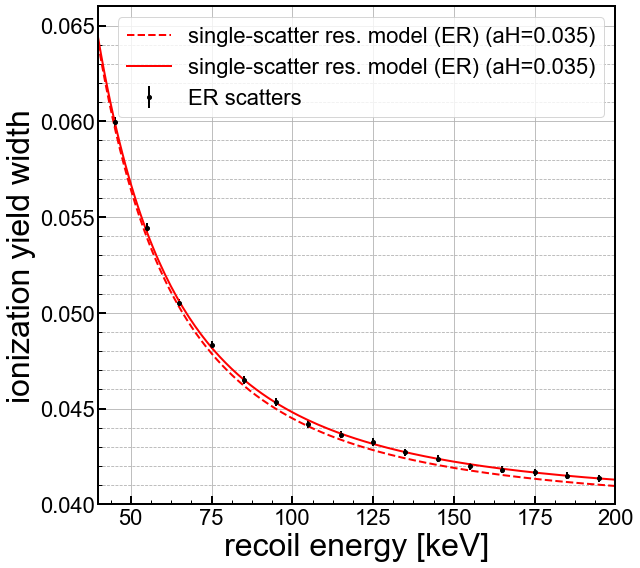

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs*qbootcorrs, yerr=(qbootsigerrsl*qbootcorrs,qbootsigerrsu*qbootcorrs), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [7]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[1.79260786e+01 8.92308546e-02 5.24379042e-02 3.79360380e-02
 3.02372057e-02 2.48253920e-02 2.29925408e-02 2.03408362e-02
 1.86625210e-02 1.85373216e-02 1.66330846e-02 1.57857269e-02
 1.71940385e-02 1.43681233e-02 1.36827904e-02 1.32045508e-02
 1.53104842e-02 1.42458195e-02 1.41161068e-02 1.34798426e-02]
[7.49516546e+00 1.27130813e-03 1.00756394e-03 9.12747223e-04
 9.16471565e-04 8.93568650e-04 8.68254108e-04 9.14755170e-04
 1.07199621e-03 1.08578290e-03 1.03098211e-03 1.16829868e-03
 1.48456948e-03 1.35755607e-03 1.65638913e-03 1.43305703e-03
 1.84511962e-03 2.23609623e-03 2.20151371e-03 2.98665996e-03]
[7.89449717e+00 1.30554255e-03 1.03652486e-03 9.12072327e-04
 9.24481508e-04 9.22571071e-04 9.10226027e-04 9.47029827e-04
 1.08949632e-03 1.13229867e-03 1.10676718e-03 1.25537397e-03
 1.59120531e-03 1.50228170e-03 1.74180444e-03 1.65417261e-03
 2.20278146e-03 2.46320816e-03 2.58038277e-03 3.86377086e-03]
[57.72116334  0.11646884  0.96039834  0.97923952  0.9856754   0.98813721
  0.99009

In [8]:
#get the NR calculations for our yield band
#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR',alpha=(1/18.0))

Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/1.000E-04/0.035/000/
True
(200,)
0.2821615260201915


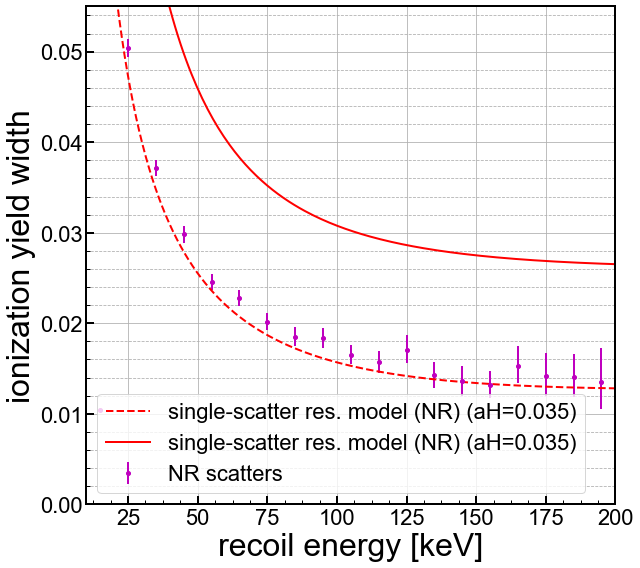

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr*qbootcorrs_nr, yerr=(qbootsigerrsl_nr*qbootcorrs_nr,qbootsigerrsu_nr*qbootcorrs_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()